# TASK 1:REG-CRICKET

In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

To read the data from the csv file

In [23]:
df=pd.read_csv("IPL2022Batters.csv")

To convert the column with average score into float data type and alloting median value to the null rows

In [24]:
import math
avg_temp=df['Runs']/(df['Inns']-df['NO'])
avg_med=math.floor(avg_temp.median())
# print(avg_med)
df['Avg']=df['Runs']/(df['Inns']-df['NO'])
for i in range(0,162):
    if df.loc[i,'NO']==df.loc[i,'Inns']:
        df.loc[i,'Avg']=avg_med

To convert the column with highest score into integer data type and removing the '*'present in some rows

In [25]:
for i in range(0,162):
    str=df.loc[i,'HS']
    len=0
    for j in str:
        len+=1
    if str[-1]=='*':
        str=str[0:len-1]
    df.loc[i,'HS']=int(str)

To check the dependency of all the features that can vary linearly with the no. of 4s

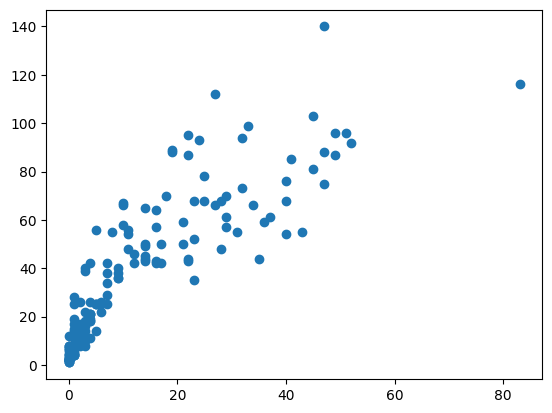

In [26]:
plt.scatter(df['4s'],df['HS'])
plt.show()

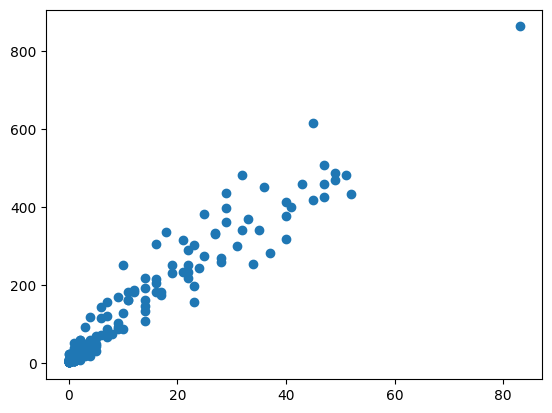

In [27]:
plt.scatter(df['4s'],df['Runs'])
plt.show()

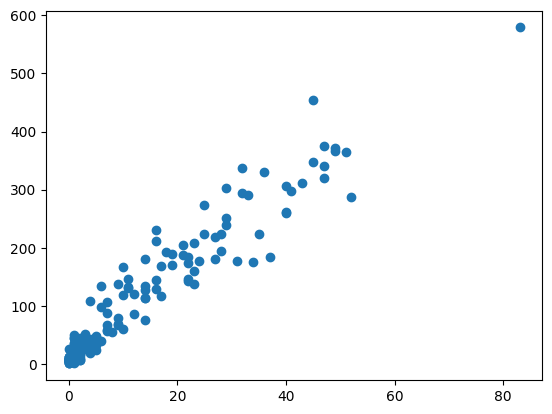

In [28]:
plt.scatter(df['4s'],df['BF'])
plt.show()

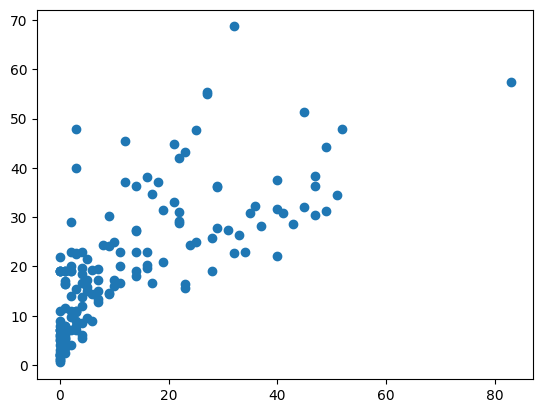

In [29]:
plt.scatter(df['4s'],df['Avg'])
plt.show()

To train the data using highest score , no. of runs and balls faced as independent variable and no. of 4s as the target

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df[['HS','Runs','BF']]
y=df['4s']

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [33]:
from sklearn import linear_model
trn=linear_model.LinearRegression()
trn.fit(X_train,Y_train)
y_pred=trn.predict(X_train)

To calculate the mean square error on train dataset

In [34]:
sq_train=0
ct=0
for index, row in X_train.iterrows():
    sq_train+=Y_train.loc[index]**2-y_pred[ct]**2
    ct+=1
mn_sq_train=sq_train/ct
print(mn_sq_train)

13.170788582094346


To calculate the mean square error on test dataset

In [36]:
y_pred_test=trn.predict(X_test)

In [37]:
sq_test=0
ct=0
for index, row in X_test.iterrows():
    sq_test+=Y_test.loc[index]**2-y_pred_test[ct]**2
    ct+=1
mn_sq_test=sq_test/ct
print(mn_sq_test)

-47.517722250515924
